In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from numpy.linalg import norm

In [78]:
X1, Y1 = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant = 0, shift = 0.0, scale = 1.0, random_state = 75)
X2, Y2 = make_blobs(n_samples=100, n_features=2, centers = ([5,9], [15,15]), random_state = 75)

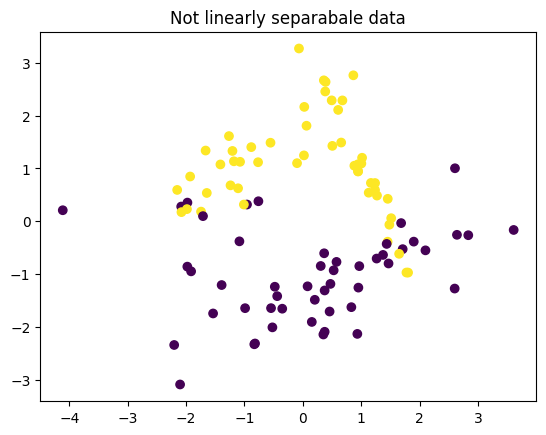

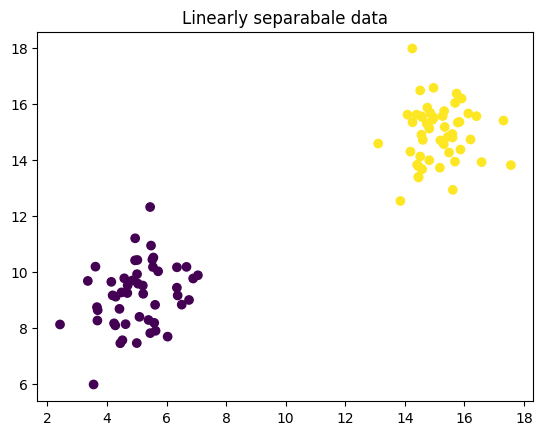

In [79]:
plt.scatter(X1[:,0], X1[:,1], c = Y1);
plt.title("Not linearly separabale data")
plt.show()
print()

plt.scatter(X2[:,0], X2[:,1], c = Y2);
plt.title("Linearly separabale data")
plt.show()

In [86]:
class SigmoidNeuron():
    def __init__(self):
        self.w = None
        self.thresh = 0.5

    def sigmoid(self, X):
        Z = np.dot(X, self.w)
        return np.exp(Z)/(1 + np.exp(Z))

    def loss(self, X, Y):
        Y_pred = self.sigmoid(X)
        return np.dot(Y, np.log(Y_pred)) + np.dot(1-Y, np.log(1- Y_pred))

    def grad_loss(self, X, Y):
        g = self.sigmoid(X)
        m = X.shape[0]
        grad = (1/m)*np.dot(X.T, g - Y)
        return grad

    def fit(self, X,Y, lr = 0.01, eps = 0.01, max_iter = 1000):
        error = eps + 1
        iter = 0
        X = np.c_[np.ones(X.shape[0]), X]
        self.w = np.random.randn(X.shape[1])

        while (iter < max_iter) and (error > eps):
          curr_loss = self.loss(X,Y)
          self.w -= lr * self.grad_loss(X, Y)
          new_loss = self.loss(X,Y)
          error = abs(curr_loss - new_loss)
          iter += 1

    def predict(self, X, thresh = 0.5):
        self.thresh = thresh
        X = np.c_[np.ones(X.shape[0]), X]
        return (self.sigmoid(X) >= thresh).astype(int)

    def accuracy_score(self, X, Y):
        Y_pred = self.predict(X, self.thresh)
        return (Y_pred == Y).sum()/ len(Y)


Accuracy score: 0.88


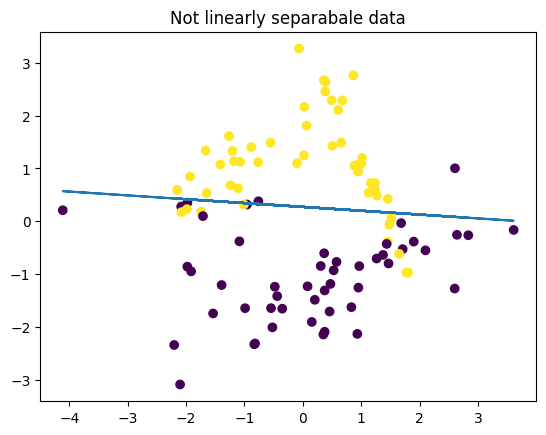

In [87]:
clf1 = SigmoidNeuron()
clf1.fit(X1, Y1)
clf1.accuracy_score(X1, Y1)
print("Accuracy score:", clf1.accuracy_score(X1, Y1))
plt.scatter(X1[:,0], X1[:,1], c = Y1);
plt.plot(X1[:,0], (-clf1.w[0] - clf1.w[1]*X1[:,0])/clf1.w[2])
plt.title("Not linearly separabale data")
plt.show()

Accuracy score: 1.0


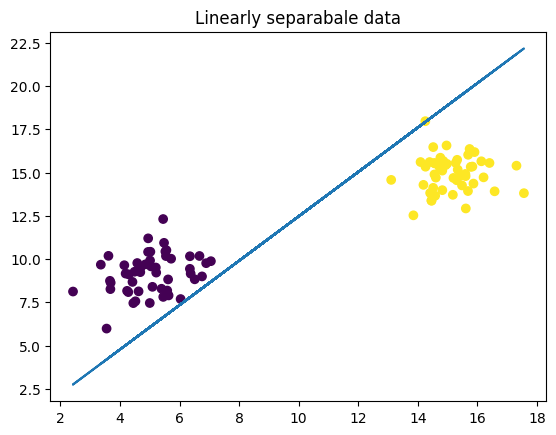

In [88]:
clf2 = SigmoidNeuron()
clf2.fit(X2, Y2)
clf2.accuracy_score(X2, Y2)
print("Accuracy score:", clf.accuracy_score(X2, Y2))
plt.scatter(X2[:,0], X2[:,1], c = Y2);
plt.plot(X2[:,0], (-clf2.w[0] - clf2.w[1]*X2[:,0])/clf2.w[2])
plt.title("Linearly separabale data")
plt.show()